In [1]:
# DAL Library
# version 2.1

source("../examples.R")
source("../graphics.R")


#loading DAL
load_dal() # see ../examples.R 

loadlibrary("ggplot2")
loadlibrary("dplyr")
loadlibrary("reshape")
loadlibrary("RColorBrewer")

Loading required package: dal


Attaching package: ‘dal’


The following object is masked from ‘package:stats’:

    optimize


The following objects are masked from ‘package:base’:

    jitter, transform


Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: reshape


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


Loading required package: RColorBrewer



In [2]:
#color palette
colors <- brewer.pal(4, 'Set1')

# This function is used only to set graphics size in this notebook. 
plot.size(10, 5)

# setting the font size for all charts
font <- theme(text = element_text(size=16))

In [3]:
#iris dataset for the example
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
data <- iris |> group_by(Species) |> summarize(mean=mean(Sepal.Length), sd=sd(Sepal.Length))
head(data)

Species,mean,sd
<fct>,<dbl>,<dbl>
setosa,5.006,0.3524897
versicolor,5.936,0.5161711
virginica,6.588,0.6358796


## Bar graph with error bars
When bar graphs present an average behavior, it is possible to plot a dispersion around it using an error bar.

The error bar is added using $geom\_errorbar()$ function to a previously defined bar graph. 

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation ideoms with `aes()`”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


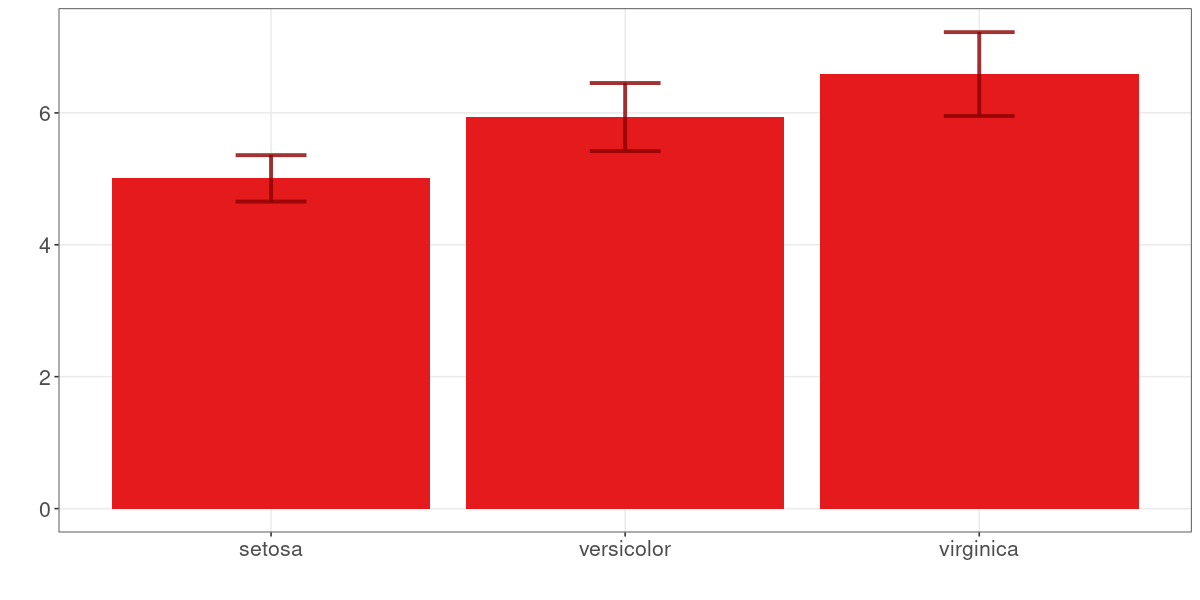

In [5]:
grf <- plot.bar(data, colors=colors[1], alpha=1) + font
grf <- grf + geom_errorbar(aes(x=Species, ymin=mean-sd, ymax=mean+sd), 
                           width=0.2, colour="darkred", alpha=0.8, size=1.1) 
plot(grf)